### Importing necessary packages

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Loading the data

In [127]:
institutions = pd.read_csv('/Users/SydneyWalker/Fall 24/Spring 25/QTM 347/College_Scorecard_Raw_Data_01162025/Most-Recent-Cohorts-Institution.csv')

/var/folders/qx/pb4kzjds0md1h66brl_wbll80000gn/T/ipykernel_51307/837263683.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1690,1692,1697,1700,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  institutions = pd.read_csv('/Users/SydneyWalker/Fall 24/Spring 25/QTM 347/College_Scorecard_Raw_Data_01162025/Most-Recent-Cohorts-Institution.csv')


### Data Preprocessing

In [128]:
# Finding well documented variables

# na_counts_per_column = institutions_df.isna().sum()
# sorted_na_counts = na_counts_per_column.sort_values()
# pd.set_option('display.max_rows', 100)
# pd.DataFrame(sorted_na_counts[400:500])

In [129]:
institutions_df = institutions[['UNITID','INSTNM','STABBR','CONTROL','HCM2','UGDS','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','FIRST_GEN','FEMALE',\
    'COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','MD_FAMINC','C150_4','C150_L4','NPT4_PUB','NPT4_PRIV','WDRAW_ORIG_YR2_RT',\
        'DEBT_MDN','RPY_1YR_RT','HIGHDEG','PREDDEG','MD_EARN_WNE_1YR','MD_EARN_WNE_5YR','MD_EARN_WNE_P10']]

In [130]:
# data = { "School": [
#         "The University of Alabama", "Auburn University", "University of Alabama at Birmingham", 
#         "University of Alaska Anchorage", "University of Alaska Fairbanks", "University of Alaska Southeast", 
#         "University of Phoenix-Arizona", "Grand Canyon University", "Arizona State University Campus Immersion", 
#         "University of Arkansas", "Arkansas State University", "Arkansas Tech University", 
#         "University of Southern California", "University of California-Los Angeles", "University of California-Berkeley", 
#         "University of Colorado Boulder", "Colorado State University-Fort Collins", "Colorado Technical University-Colorado Springs", 
#         "University of Connecticut", "Yale University", "Central Connecticut State University", 
#         "University of Delaware", "Wilmington University", "Delaware Technical Community College-Terry", 
#         "George Washington University", "Georgetown University", "American University", 
#         "University of Central Florida", "Florida International University", "Miami Dade College", 
#         "University of Georgia", "Kennesaw State University", "Georgia State University", 
#         "University of Hawaii at Manoa", "Kapiolani Community College", "Leeward Community College", 
#         "Brigham Young University-Idaho", "Boise State University", "Idaho State University", 
#         "University of Illinois Urbana-Champaign", "University of Illinois Chicago", "Chamberlain University-Illinois", 
#         "Ivy Tech Community College", "Purdue University-Main Campus", "Indiana University-Bloomington", 
#         "Iowa State University", "University of Iowa", "University of Northern Iowa", "University of Kansas", 
#         "Kansas State University", "Johnson County Community College", "University of Kentucky", "University of Louisville", 
#         "Western Kentucky University", "Louisiana State University and Agricultural & Mechanical College", 
#         "University of Louisiana at Lafayette", "Southeastern Louisiana University", "University of Maine", 
#         "University of Southern Maine", "University of New England", 
#         "Towson University", "University of Maryland-College Park", "Johns Hopkins University", 
#         "Boston University", "Harvard University", "University of Massachusetts-Amherst", 
#         "Michigan State University", "University of Michigan-Ann Arbor","Wayne State University", 
#         "University of Minnesota-Twin Cities", "Minnesota State University-Mankato", "Capella University", 
#         "University of Mississippi", "Mississippi State University", "University of Southern Mississippi", 
#         "University of Missouri-Columbia", "Missouri State University-Springfield", "Saint Louis Community College", 
#         "Montana State University", "The University of Montana", "Montana State University Billings", 
#         "University of Nebraska-Lincoln", "University of Nebraska at Omaha", "Metropolitan Community College Area", 
#         "College of Southern Nevada", "University of Nevada-Las Vegas", "University of Nevada-Reno", 
#         "Southern New Hampshire University", "University of New Hampshire-Main Campus", "Dartmouth College", 
#         "Rutgers University-New Brunswick", "Montclair State University", "Rowan University", 
#         "University of New Mexico-Main Campus", "Central New Mexico Community College", "New Mexico State University-Main Campus", 
#         "New York University", "University at Buffalo", "Columbia University in the City of New York", 
#         "North Carolina State University at Raleigh", "University of North Carolina at Chapel Hill","University of North Carolina at Charlotte", 
#         "University of North Dakota", "North Dakota State University-Main Campus", "University of Mary", 
#         "Ohio State University-Main Campus", "University of Cincinnati-Main Campus", "Ohio University-Main Campus", 
#         "University of Oklahoma-Norman Campus", "Oklahoma State University-Main Campus", "Tulsa Community College", 
#         "Oregon State University", "Portland Community College", "Portland State University", 
#         "Pennsylvania State University-Main Campus", "Temple University", "University of Pittsburgh-Pittsburgh Campus", 
#         "University of Rhode Island", "Community College of Rhode Island", "Brown University", 
#         "University of South Carolina-Columbia", "Clemson University", "Trident Technical College", 
#         "South Dakota State University", "University of South Dakota", "Black Hills State University", 
#         "The University of Tennessee-Knoxville", "Middle Tennessee State University", "University of Memphis", 
#         "Lone Star College System", "Texas A & M University-College Station", "Houston Community College", 
#         "Western Governors University", "Utah Valley University", "Brigham Young University", 
#         "University of Vermont", "Community College of Vermont", "Champlain College", 
#         "Liberty University", "Northern Virginia Community College", "George Mason University", 
#         "University of Washington-Seattle Campus", "Washington State University", "Western Washington University", 
#         "American Public University System", "West Virginia University", "Marshall University", 
#         "University of Wisconsin-Madison", "University of Wisconsin-Milwaukee", "University of Wisconsin-Oshkosh", 
#         "University of Wyoming", "Northern Wyoming Community College District", "Laramie County Community College"]}

# df = pd.DataFrame(data)

# df.to_excel('schools_by_state.xlsx', index=False)

In [131]:
schools_by_state = pd.read_excel('/Users/SydneyWalker/Fall 24/Spring 25/QTM 347/schools_by_state.xlsx')

In [132]:
# Filter institutions_df where INSTNM is in df['School']
institutions_df = institutions_df[institutions_df['INSTNM'].isin(schools_by_state['School'])]

In [133]:
institutions_df['COMP_ALL'] = institutions_df['C150_4'].fillna(institutions_df['C150_L4'])
institutions_df.drop(columns=['C150_4', 'C150_L4'], inplace=True)

institutions_df['COST_ALL'] = institutions_df['NPT4_PRIV'].fillna(institutions_df['NPT4_PUB'])
institutions_df.drop(columns=['NPT4_PUB', 'NPT4_PRIV'], inplace=True)

### Checking null values

In [134]:
na_counts_per_column = institutions_df.isna().sum()
sorted_na_counts = na_counts_per_column.sort_values()
top_30_columns = sorted_na_counts.head(100)
pd.set_option('display.max_rows', 120)
display(pd.DataFrame(top_30_columns))

,0
UNITID,0
MD_EARN_WNE_P10,0
MD_EARN_WNE_5YR,0
MD_EARN_WNE_1YR,0
PREDDEG,0
HIGHDEG,0
RPY_1YR_RT,0
DEBT_MDN,0
WDRAW_ORIG_YR2_RT,0
MD_FAMINC,0


### Variables defined 

#### Institution Information
UNITID: Unit ID for institution

INSTNM: Institution name

STABBR: State postcode

CONTROL: Control of institution (public/private nonprofit/private for-profit)

HCM2: Indicator for Title IV eligibility

HIGHDEG: Highest degree awarded

       0 Non-degree-granting
       1 Certificate degree
       2 Associate degree
       3 Bachelor's degree
       4 Graduate degree

PREDDEG: Predominant undergraduate degree awarded

       0 Not classified
       1 Predominantly certificate-degree granting
       2 Predominantly associate's-degree granting
       3 Predominantly bachelor's-degree granting
       4 Entirely graduate-degree granting

#### Admissions & Enrollment
ADM_RATE: Admission rate

UGDS: Enrollment of undergraduate certificate/degree-seeking students

UGDS_BLACK: Total share of enrollment of undergraduate degree-seeking students who are Black

UGDS_HISP: Total share of enrollment of undergraduate degree-seeking students who are Hispanic

UGDS_ASIAN: Total share of enrollment of undergraduate degree-seeking students who are Asian

FEMALE: Share of female students

FIRST_GEN: Share of first-generation students

### Cost
COSTT4_A: Average cost of attendance (academic year institutions)

COST_ALL: Average net price for all two or four year institutions

TUITIONFEE_IN: In-state tuition and fees

TUITIONFEE_OUT: Out-of-state tuition and fees

#### Outcomes
COMP_ALL: Completion rate for first-time, full-time students for all institutions 

WDRAW_ORIG_YR2_RT: Percent withdrawn from original institution within 2 years

#### Earnings & Debt

MD_FAMINC: Median family income

DEBT_MDN: The median original amount of the loan principal upon entering repayment

RPY_1YR_RT: Fraction of repayment cohort who are not in default, and with loan balances that have declined one year since entering repayment

MD_EARN_WNE_1YR: Median earnings of graduates working and not enrolled 1 year after completing

MD_EARN_WNE_5YR: Median earnings of graduates working and not enrolled 5 years after completing

MD_EARN_WNE_P10: Median earnings of students working and not enrolled 10 years after entry


### Exploratory Question: Are colleges with higher tuition necesarily associated with higher post-graduate earnings?

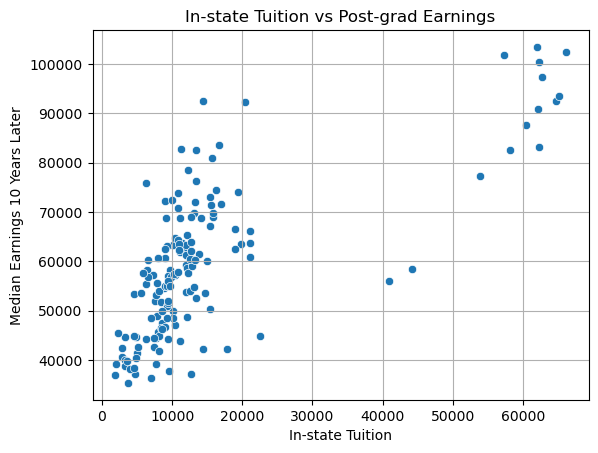

Correlation between in-state tuition and post-grad earnings: 0.719439763949262


In [135]:
sns.scatterplot(x='TUITIONFEE_IN', y='MD_EARN_WNE_P10', data=institutions_df)
plt.title("In-state Tuition vs Post-grad Earnings")
plt.xlabel("In-state Tuition")
plt.ylabel("Median Earnings 10 Years Later")
plt.grid(True)
plt.show()

corr = institutions_df[['TUITIONFEE_IN', 'MD_EARN_WNE_P10']].corr().iloc[0, 1]
print("Correlation between in-state tuition and post-grad earnings:", corr)

### Exploratory Analysis

In [136]:
X = institutions_df.drop(columns=['UNITID','INSTNM','STABBR','MD_EARN_WNE_1YR', 'MD_EARN_WNE_5YR', 'MD_EARN_WNE_P10'])
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)
y = institutions_df[['MD_EARN_WNE_P10']]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        MD_EARN_WNE_P10   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     52.46
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.24e-51
Time:                        15:49:34   Log-Likelihood:                -1532.5
No. Observations:                 153   AIC:                             3103.
Df Residuals:                     134   BIC:                             3161.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.383e+04   1.36e+0

### KNN Analysis 

In [137]:
#Keep only numeric columns and target
institutions_clean = institutions_df.copy()

#Replace strings ("PS") with NaN
institutions_clean.replace("PrivacySuppressed", np.nan, inplace=True)

#Convert columns to numeric
for col in institutions_clean.columns:
    institutions_clean[col] = pd.to_numeric(institutions_clean[col], errors='coerce')

#Define features (X) and target (y)
features = institutions_clean.drop(columns=['UNITID','INSTNM','STABBR','MD_EARN_WNE_1YR', 'MD_EARN_WNE_5YR', 'MD_EARN_WNE_P10'])
target = institutions_clean['MD_EARN_WNE_P10']

# Drop rows where target is missing
Xy = pd.concat([features, target], axis=1).dropna(subset=['MD_EARN_WNE_P10'])
X = Xy[features.columns]
y = Xy['MD_EARN_WNE_P10']

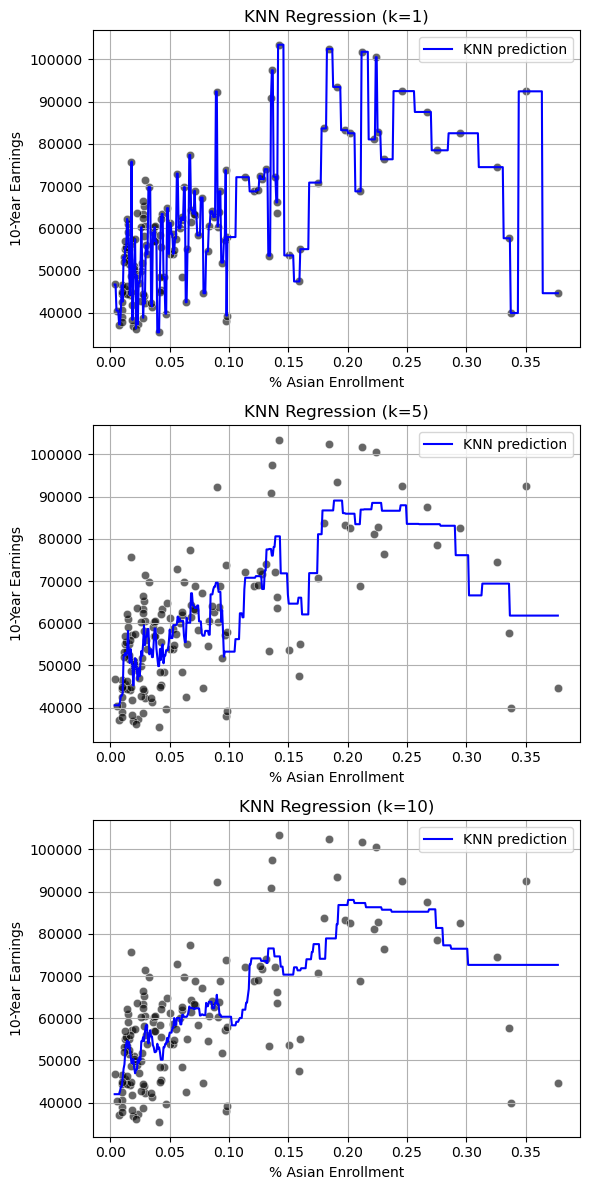

In [138]:
# UDGS_ASIAN as KNN Regressor because of high correlation 

from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plot_df = institutions_df[['UGDS_ASIAN', 'MD_EARN_WNE_P10']].dropna()

X_values = plot_df['UGDS_ASIAN'].values.reshape(-1, 1)
y_values = plot_df['MD_EARN_WNE_P10'].values


T = np.linspace(X_values.min(), X_values.max(), 500).reshape(-1, 1)


fig, axes = plt.subplots(3, 1, figsize=(6, 12))
k_vals = [1, 5, 10]

for i, k in enumerate(k_vals):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_values, y_values)
    y_pred = knn.predict(T)
    
    sns.lineplot(x=T.flatten(), y=y_pred, ax=axes[i], color='blue', label='KNN prediction')
    sns.scatterplot(x=plot_df['UGDS_ASIAN'], y=plot_df['MD_EARN_WNE_P10'], ax=axes[i], color='black', alpha=0.6)
    
    axes[i].set_title(f'KNN Regression (k={k})')
    axes[i].set_xlabel('% Asian Enrollment') #Total share of enrollment of undergraduate degree-seeking students who are Asian
    axes[i].set_ylabel('10-Year Earnings')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


#### Train/test split and scale

In [139]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [140]:
# KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicting on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2: {r2:.3f}")

Test RMSE: 6848.20
Test R^2: 0.866


#### Error Correlation Analysis 

In [141]:
df_test = X_test.copy()
df_test['Actual_Earnings'] = y_test
df_test['Predicted_Earnings'] = y_pred
df_test['Prediction_Error'] = y_test - y_pred 

In [142]:
X = df_test
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)
y = df_test[['Prediction_Error']]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Prediction_Error   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.585e+29
Date:                Mon, 05 May 2025   Prob (F-statistic):          6.26e-145
Time:                        15:49:35   Log-Likelihood:                 735.20
No. Observations:                  31   AIC:                            -1428.
Df Residuals:                      10   BIC:                            -1398.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.365e-11   1.84

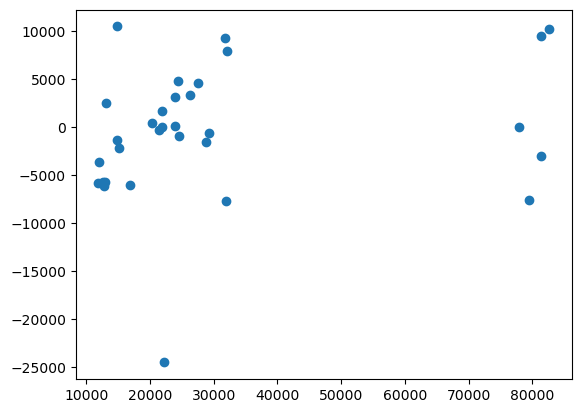

In [143]:
plt.scatter('COSTT4_A','Prediction_Error', data = df_test)
plt.show()

### Hyperparameter tuning

In [144]:
# Pipeline for imputation → scaling → KNN
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Testing k = [1, 20]
param_grid = {
    'knn__n_neighbors': list(range(1, 21))
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract cross-validated RMSEs
mean_rmse = (-grid_search.cv_results_['mean_test_score'])**0.5
k_values = param_grid['knn__n_neighbors']

# Best model
best_k = grid_search.best_params_['knn__n_neighbors']
best_rmse = (-grid_search.best_score_) ** 0.5

print(f"Best k: {best_k}")
print(f"Cross-validated RMSE: {best_rmse:.2f}")


Best k: 3
Cross-validated RMSE: 7110.36


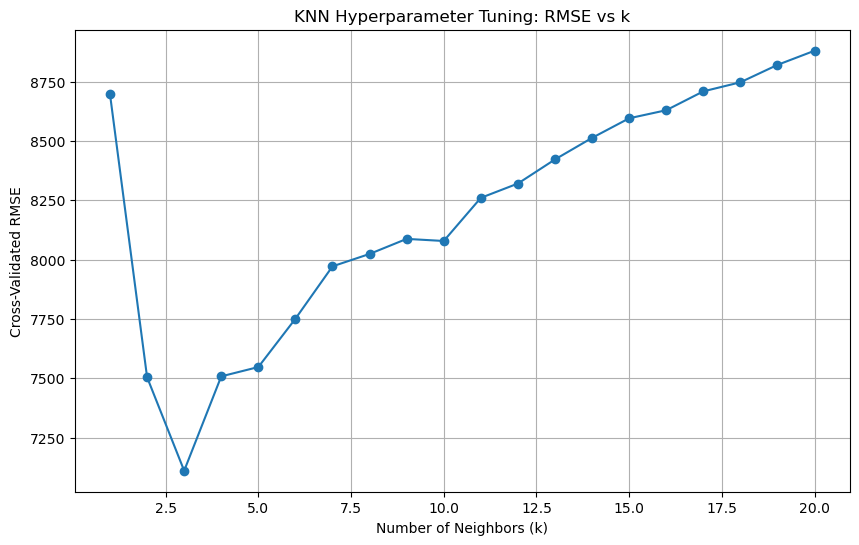

In [145]:
# RMSE vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_rmse, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated RMSE')
plt.title('KNN Hyperparameter Tuning: RMSE vs k')
plt.grid(True)
plt.show()

### Evaluate best model on test set

In [146]:
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE (best k={best_k}): {test_rmse:.2f}")
print(f"Test R^2 (best k={best_k}): {test_r2:.3f}")


Test RMSE (best k=3): 6753.68
Test R^2 (best k=3): 0.870


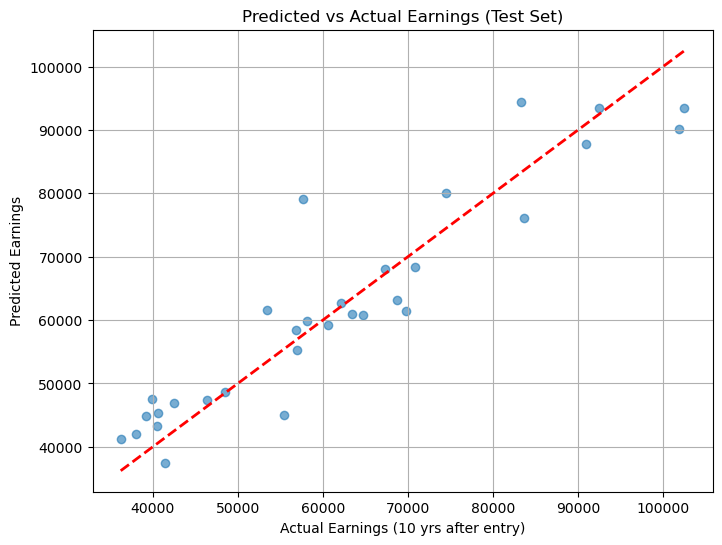

In [147]:
# Predicted vs Actual
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Earnings (10 yrs after entry)")
plt.ylabel("Predicted Earnings")
plt.title("Predicted vs Actual Earnings (Test Set)")
plt.grid(True)
plt.show()

### KNN clustering of ROI

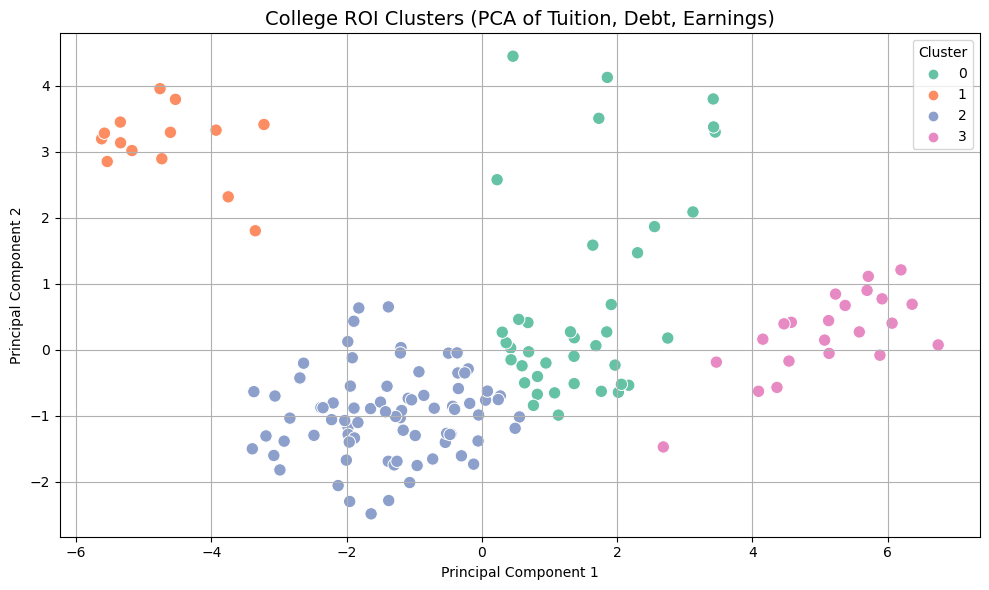

In [148]:
X = institutions_df.drop(columns=['UNITID','INSTNM','STABBR','MD_EARN_WNE_1YR', 'MD_EARN_WNE_5YR', 'MD_EARN_WNE_P10'])
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)

# ROI-related features
roi_features = ['CONTROL','HCM2','UGDS','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','FIRST_GEN','FEMALE',\
    'COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','MD_FAMINC','COMP_ALL','COST_ALL','WDRAW_ORIG_YR2_RT',\
        'DEBT_MDN','RPY_1YR_RT','HIGHDEG','PREDDEG']

df = institutions_df.replace("PrivacySuppressed", np.nan)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_cluster = df[['INSTNM'] + roi_features].copy()

# Impute + scale
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_cluster[roi_features])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=123, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cluster['PC1'] = X_pca[:, 0]
df_cluster['PC2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=80)
plt.title("College ROI Clusters (PCA of Tuition, Debt, Earnings)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Forward Selection of KNN Variables 

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Prep your data
features = ['CONTROL','HCM2','UGDS','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','FIRST_GEN','FEMALE',
    'COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','MD_FAMINC','COMP_ALL','COST_ALL','WDRAW_ORIG_YR2_RT',
    'DEBT_MDN','RPY_1YR_RT','HIGHDEG','PREDDEG']

X = df[features].dropna()
y = df.loc[X.index, 'MD_EARN_WNE_P10']

# Scale features for KNN
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Initialize
selected_features = []
remaining_features = list(X.columns)
best_rmse = float('inf')
rmse_progress = []

while remaining_features:
    scores = []
    for feature in remaining_features:
        try_features = selected_features + [feature]
        knn = KNeighborsRegressor(n_neighbors=5)
        neg_mse = cross_val_score(knn, X_scaled[try_features], y, cv=5, scoring='neg_mean_squared_error')
        rmse = np.mean(np.sqrt(-neg_mse))
        scores.append((rmse, feature))
    
    scores.sort()
    best_new_rmse, best_new_feature = scores[0]
    
    if best_new_rmse < best_rmse:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_rmse = best_new_rmse
        rmse_progress.append((best_new_rmse, list(selected_features)))
    else:
        break  # No improvement, stop selection

# Final selected features and lowest RMSE
print("Selected features:", selected_features)
print("Lowest RMSE:", best_rmse)

Selected features: ['COMP_ALL', 'UGDS_HISP', 'RPY_1YR_RT', 'COSTT4_A', 'WDRAW_ORIG_YR2_RT', 'FIRST_GEN', 'UGDS_ASIAN', 'UGDS']
Lowest RMSE: 5732.610441803561
